#### Image Recognition and classification tasks using Cifar10 dataset from tensorflow containing 10 different classes

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and preprocess the CIFAR-10 dataset
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize the images to values between 0 and 1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convert class labels to one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Build the CNN model
def build_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


170498071/170498071 [==============================] - 33s 0us/step



Epoch 1/10


782/782 [==============================] - 35s 41ms/step - loss: 1.4917 - accuracy: 0.4557 - val_loss: 1.2426 - val_accuracy: 0.5580
Epoch 2/10
782/782 [==============================] - 159s 204ms/step - loss: 1.1014 - accuracy: 0.6101 - val_loss: 1.0047 - val_accuracy: 0.6466
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 0.9334 - accuracy: 0.6731 - val_loss: 0.9782 - val_accuracy: 0.6560
Epoch 4/10
782/782 [==============================] - 26s 33ms/step - loss: 0.8209 - accuracy: 0.7107 - val_loss: 0.8853 - val_accuracy: 0.6902
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.7398 - accuracy: 0.7399 - val_loss: 0.8449 - val_accuracy: 0.7096
Epoch 6/10
782/782 [==============================] - 27s 35ms/step - loss: 0.6636 - accuracy: 0.7660 - val_loss: 0.8427 - val_accuracy: 0.7129
Epoch 7/10
782/782 [==============================] - 30s 38

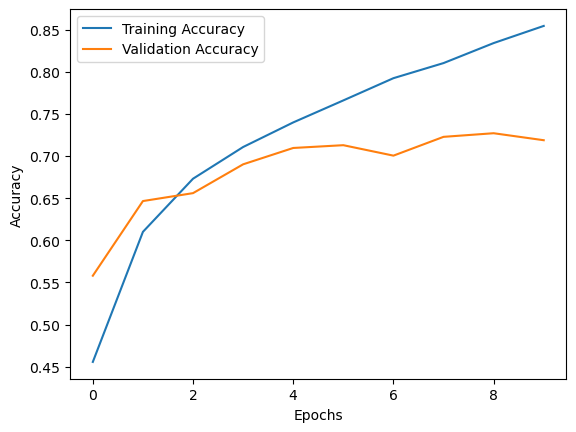

313/313 [==============================] - 2s 6ms/step - loss: 0.9125 - accuracy: 0.7188
Test Accuracy: 0.72
Model saved as 'image_classifier.h5'.


C:\Users\hello\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
# Train the model
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    return history

# Plot training and validation accuracy
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Main function
def main():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Build the CNN model
    model = build_cnn_model()

    # Train the model
    history = train_model(model, x_train, y_train, x_test, y_test)

    # Plot training history
    plot_history(history)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.2f}")

    # Save the trained model
    model.save("image_classifier.h5")
    print("Model saved as 'image_classifier.h5'.")

if __name__ == "__main__":
    main()


#### Test image: bird 

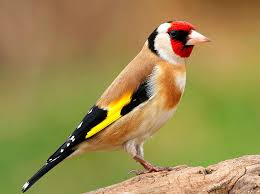

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_predict_custom_image(image_path, model):
    # Load the image with the correct target size (e.g., 32x32 for CIFAR-10)
    img = image.load_img(image_path, target_size=(32, 32))  # Change size according to your model's input size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize the image

    # Ensure that model is loaded correctly
    if not isinstance(model, tf.keras.Model):
        raise ValueError("The provided model is not a valid Keras model")

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class (the index of the highest probability)
    predicted_class = np.argmax(predictions)

    return predicted_class, predictions

# Load the model (make sure to replace with the correct path to your model file)
model = tf.keras.models.load_model("image_classifier.h5")

# Test with a custom image
image_path = 'images/bird.jpg'  # Provide the path to your image
predicted_class, predictions = load_and_predict_custom_image(image_path, model)

# Output the predicted class and probabilities
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {predictions}")


1/1 [==============================] - 0s 137ms/step
Predicted class: 2
Prediction probabilities: [[5.1746592e-05 5.2460575e-07 9.8184872e-01 5.1051169e-04 2.2675920e-05
  1.7329441e-02 8.1116428e-05 1.5136487e-04 1.4289342e-06 2.4853557e-06]]


In [10]:
# Define class labels for CIFAR-10
CIFAR_10_CLASSES = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

# Predicted class index
predicted_class = 2  
# Map the predicted class index to the class label
predicted_class_label = CIFAR_10_CLASSES[predicted_class]

print(f"Predicted class index: {predicted_class}")
print(f"Predicted class label: {predicted_class_label}")


Predicted class index: 2
Predicted class label: bird
